In [1]:
import numpy as np




In [2]:
import pandas as pd


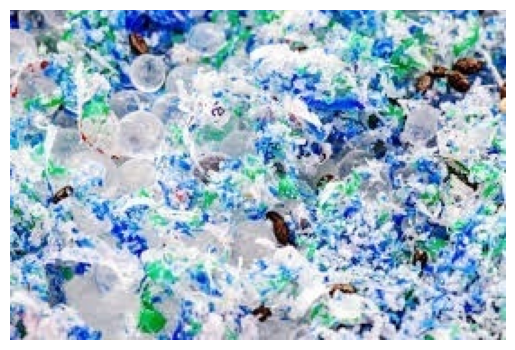

True

In [3]:
import cv2
from matplotlib import pyplot as plt


# Load an image from disk
image = cv2.imread('image3.jpg')

# Convert the image from BGR to RGB (OpenCV loads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Check if the image was loaded successfully
if image is not None:
    # Display the image using Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print("Error: Unable to load the image.")

# Save the image to disk in a different format
cv2.imwrite('image3.jpg', image)


In [4]:
import os
import cv2
import numpy as np

# Function to load and preprocess images
def load_images_from_folders(folders):
    images = []
    labels = []
    for class_id, folder in enumerate(folders):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            if img_path.endswith(".jpg") or img_path.endswith(".png"):
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load image in color (BGR)
                if img is not None:
                    img = cv2.resize(img, (100, 100))  # Resize image if necessary
                    images.append(img)
                    labels.append(class_id)  # Assign class label based on subdirectory index
    return images, labels

# Load images from train dataset
train_folders = ["/workspaces/TRY/DATASET/DATASET/TEST/O", "/workspaces/TRY/DATASET/DATASET/TEST/R"]
train_images, train_labels = load_images_from_folders(train_folders)

# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)


X_train = X_train.astype('float32') / 255.0

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (2513, 100, 100, 3)
y_train shape: (2513,)


In [5]:
import cv2
import os
import numpy as np

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            if img is not None:
                img = cv2.resize(img, (100, 100))  # Resize image if necessary
                images.append(img)
                labels.append(1 if "cat" in filename else 0)  # Example: 1 for cat, 0 for non-cat
    return images, labels

# Load images from train dataset
train_folder = "/workspaces/TRY/DATASET/TRAIN"
train_images, train_labels = load_images_from_folder(train_folder)

# Load images from test dataset
test_folder = "/workspaces/TRY/DATASET/TEST"
test_images, test_labels = load_images_from_folder(test_folder)

# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the input data to be in the form of (samples, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Now, you can use these datasets to train and test your machine learning model.


X_train shape: (0, 1)
y_train shape: (0,)
X_test shape: (0, 1)
y_test shape: (0,)


In [6]:
import cv2
import os
import numpy as np

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load image in color (BGR)
            if img is not None:
                img = cv2.resize(img, (100, 100))  # Resize image if necessary
                images.append(img)
                labels.append(1 if "R" in filename else 0)  # 1 for "R" (recycle), 0 for "O" (organic)
    return images, labels

# Load images from train dataset
train_folder = "/workspaces/TRY/DATASET/DATASET/TRAIN"
train_images, train_labels = load_images_from_folder(train_folder)

# Load images from test dataset
test_folder = "/workspaces/TRY/DATASET/DATASET/TEST"
test_images, test_labels = load_images_from_folder(test_folder)

# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the input data to be in the form of (samples, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Now, you can use these datasets to train and test your machine learning model.


X_train shape: (0, 1)
y_train shape: (0,)
X_test shape: (0, 1)
y_test shape: (0,)


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Function to load and preprocess images
def load_images_from_folders(folders):
    images = []
    labels = []
    for class_id, folder in enumerate(folders):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            if img_path.endswith(".jpg") or img_path.endswith(".png"):
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load image in color (BGR)
                if img is not None:
                    img = cv2.resize(img, (100, 100))  # Resize image if necessary
                    images.append(img)
                    labels.append(class_id)  # Assign class label based on subdirectory index
    return images, labels

# Load images from train dataset
train_folders = ["/workspaces/TRY/DATASET/DATASET/TEST/O", "/workspaces/TRY/DATASET/DATASET/TEST/R"]
train_images, train_labels = load_images_from_folders(train_folders)

# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0

# Split the data into training and testing datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)
# Save the trained model
model.save("model.h5")


2024-07-07 16:22:18.619924: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-07 16:22:19.572837: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-07 16:22:19.949440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 16:22:20.595795: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 16:22:20.599881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 16:22:21.646469: I tensorflow/core/platform/cpu_feature_guard.cc:

Epoch 1/10


2024-07-07 16:22:28.254014: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 241200000 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.7305 - loss: 0.5443

2024-07-07 16:22:48.600206: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 60360000 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 316ms/step - accuracy: 0.7321 - loss: 0.5419 - val_accuracy: 0.9085 - val_loss: 0.2479
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - accuracy: 0.9101 - loss: 0.2260 - val_accuracy: 0.9165 - val_loss: 0.2154
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - accuracy: 0.9263 - loss: 0.1726 - val_accuracy: 0.8748 - val_loss: 0.3186
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 282ms/step - accuracy: 0.9273 - loss: 0.1848 - val_accuracy: 0.9324 - val_loss: 0.2190
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 305ms/step - accuracy: 0.9472 - loss: 0.1640 - val_accuracy: 0.9304 - val_loss: 0.1810
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.9503 - loss: 0.1350 - val_accuracy: 0.9304 - val_loss: 0.1757
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.9504 - loss: 0.1231 - val_accuracy: 0.9423 - val_loss: 0.1952
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step - accuracy: 0.9689 - loss: 0.0931 - val_accuracy: 0.888

2024-07-07 16:26:32.552286: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 60360000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9409 - loss: 0.1826


Test accuracy: 0.9383698105812073


In [8]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/workspaces/TRY/model.h5')  # Assuming the model is saved as an HDF5 file

# Path to the image you want to classify
image_path = '/workspaces/TRY/image.jpg'

# Preprocess the image (you can reuse the preprocess_image function defined earlier)
image = preprocess_image(image_path)

# Predict the class probabilities
probabilities = model.predict(image)

# Classify the image based on thresholding (similar to the previous code)
threshold = 0.5  # Adjust the threshold as needed
if probabilities[0][0] > threshold:
    print("Predicted class: Recyclable")
else:
    print("Predicted class: Organic")



NameError: name 'preprocess_image' is not defined

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/workspaces/TRY/model.h5')  # Assuming the model is saved as an HDF5 file

# Path to the image you want to classify
image_path = '/workspaces/TRY/image2.jpg'

# Preprocess the image (you can reuse the preprocess_image function defined earlier)
image = preprocess_image(image_path)

# Predict the class probabilities
probabilities = model.predict(image)

# Classify the image based on thresholding (similar to the previous code)
threshold = 0.5  # Adjust the threshold as needed
if probabilities[0][0] > threshold:
    print("Predicted class: Recyclable")
else:
    print("Predicted class: Organic")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class: Organic


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/workspaces/TRY/model.h5')  # Assuming the model is saved as an HDF5 file

# Path to the image you want to classify
image_path = '/workspaces/TRY/image4.jpg'

# Preprocess the image (you can reuse the preprocess_image function defined earlier)
image = preprocess_image(image_path)

# Predict the class probabilities
probabilities = model.predict(image)

# Classify the image based on thresholding (similar to the previous code)
threshold = 0.5  # Adjust the threshold as needed
if probabilities[0][0] > threshold:
    print("Predicted class: Recyclable")
else:
    print("Predicted class: Organic")



NameError: name 'preprocess_image' is not defined

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/workspaces/TRY/model.h5')  # Assuming the model is saved as an HDF5 file

# Path to the image you want to classify
image_path = '/workspaces/TRY/image3.jpg'

# Preprocess the image (you can reuse the preprocess_image function defined earlier)
image = preprocess_image(image_path)

# Predict the class probabilities
probabilities = model.predict(image)

# Classify the image based on thresholding (similar to the previous code)
threshold = 0.5  # Adjust the threshold as needed
if probabilities[0][0] > threshold:
    print("Predicted class: Recyclable")
else:
    print("Predicted class: Organic")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class: Recyclable


ModuleNotFoundError: No module named 'streamlit'